# Homework 06

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from src.data_preparation import create_datasets
from src.residual_net import ResNet, ResidualBlock
from src.dense_net import DenseNet, DenseBlock, TransitionLayer
from src.training import training
from src.visualizer import show_images, plot_results, show_layer_output

## 1. Dataset
We are working with the [Cifar10 dataset](https://www.tensorflow.org/datasets/catalog/cifar10) this week. It contains 60.000 RGB images (32,32,3) of 10 classes.

In [2]:
# Loading preprocessed and splitted datasets into a dictonary => {'train':…, 'valid':…, 'test':…}
datasets = create_datasets(batch_size=64)

To display a few sample images the following code will extract some images from the test-dataset. As the data was standartized while preprocessing it has to be normalized to a range from 0-1 using the following formula: $z_i=\frac{x_i-\min(x)}{\max(x)-\min(x)}$

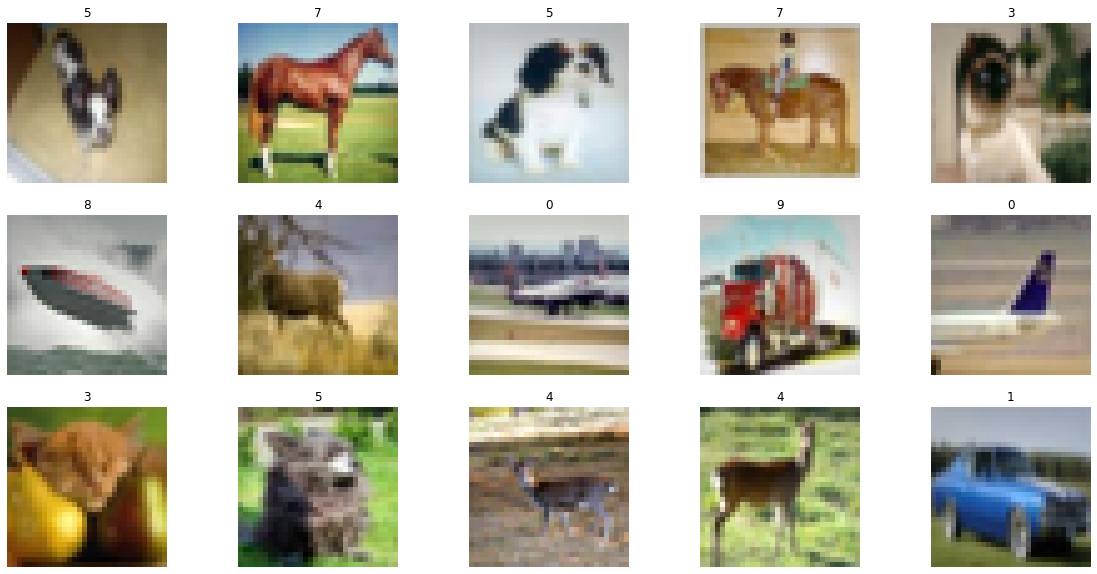

In [3]:
show_images(datasets, normalize=True, shape=(3,5))

## 2. Model


### 2.1 ResNet

In [4]:
# Initializing the Residual Network
res_net_model = ResNet(layer_list=[
    tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding='same'),
    ResidualBlock(filters_out=32),
    ResidualBlock(filters_out=32),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Build model to output it's summary
res_net_model.build(input_shape=(None, 32, 32, 3))
res_net_model.summary()

Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          multiple                  4736      
                                                                 
 residual_block (ResidualBlo  multiple                 37344     
 ck)                                                             
                                                                 
 residual_block_1 (ResidualB  multiple                 37344     
 lock)                                                           
                                                                 
 global_average_pooling2d_1   multiple                 0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           multiple                  0         
                                                           

### 2.2 DenseNet

In [5]:
# Initializing the Densely Connected Convolutional Network
dense_net_model = DenseNet(layer_list=[
        DenseBlock(block_number=5, out_filters=64),
        TransitionLayer(filter_amount=32),
        DenseBlock(block_number=5, out_filters=32),
        TransitionLayer(filter_amount=16),
        DenseBlock(block_number=3, out_filters=32),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10, 'softmax')
])

# Build model to output it's summary
dense_net_model.build(input_shape=(None, 32, 32, 3))
dense_net_model.summary()

Model: "dense_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_block_3 (DenseBlock)  multiple                  193600    
                                                                 
 transition_layer_2 (Transit  multiple                 10496     
 ionLayer)                                                       
                                                                 
 dense_block_4 (DenseBlock)  multiple                  64640     
                                                                 
 transition_layer_3 (Transit  multiple                 3152      
 ionLayer)                                                       
                                                                 
 dense_block_5 (DenseBlock)  multiple                  24960     
                                                                 
 global_average_pooling2d_2   multiple                 0 

## 3. Training & Analysis

In [6]:
# Initialize the loss-function
cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()
# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

losses_res, accuracies_res = training(res_net_model, datasets,
                              cross_entropy_loss,
                              optimizer, epochs=30)

Epoch 1 starting with validation accuracy of 0.115 and validation loss of 2.4709
Epoch 2 starting with validation accuracy of 0.455 and validation loss of 1.5097
Epoch 3 starting with validation accuracy of 0.514 and validation loss of 1.3438
Epoch 4 starting with validation accuracy of 0.558 and validation loss of 1.2373
Epoch 5 starting with validation accuracy of 0.592 and validation loss of 1.1300
Epoch 6 starting with validation accuracy of 0.613 and validation loss of 1.0794
Epoch 7 starting with validation accuracy of 0.634 and validation loss of 1.0375
Epoch 8 starting with validation accuracy of 0.637 and validation loss of 1.0285
Epoch 9 starting with validation accuracy of 0.661 and validation loss of 0.9695
Epoch 10 starting with validation accuracy of 0.66 and validation loss of 0.9660
Epoch 11 starting with validation accuracy of 0.668 and validation loss of 0.9335
Epoch 12 starting with validation accuracy of 0.68 and validation loss of 0.9220
Epoch 13 starting with vali

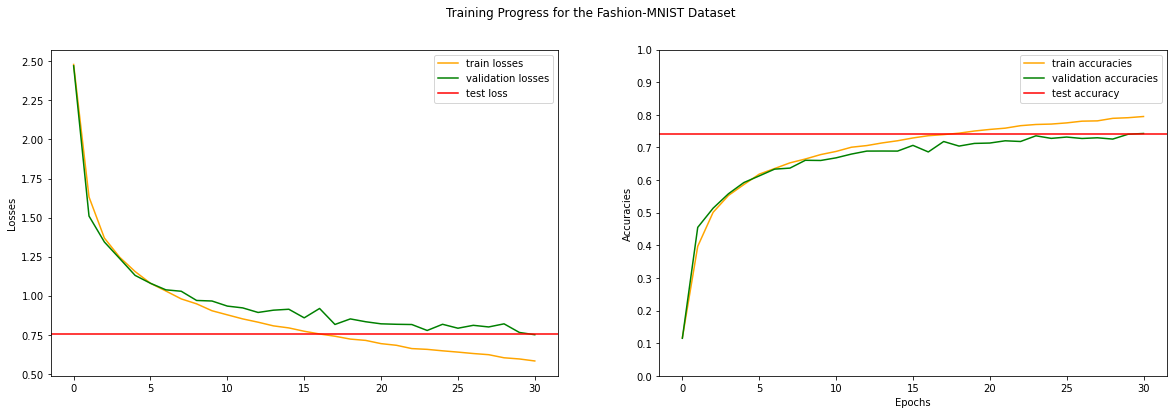

In [7]:
plot_results(losses_res, accuracies_res)

In [8]:
# Initialize the loss-function
cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()
# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

losses_dense, accuracies_dense = training(dense_net_model, datasets,
                              cross_entropy_loss,
                              optimizer, epochs=30)

Epoch 1 starting with validation accuracy of 0.096 and validation loss of 2.4540
Epoch 2 starting with validation accuracy of 0.338 and validation loss of 1.8072
Epoch 3 starting with validation accuracy of 0.364 and validation loss of 1.7311
Epoch 4 starting with validation accuracy of 0.393 and validation loss of 1.6752
Epoch 5 starting with validation accuracy of 0.405 and validation loss of 1.6474
Epoch 6 starting with validation accuracy of 0.403 and validation loss of 1.6491
Epoch 7 starting with validation accuracy of 0.422 and validation loss of 1.6262
Epoch 8 starting with validation accuracy of 0.433 and validation loss of 1.6085
Epoch 9 starting with validation accuracy of 0.431 and validation loss of 1.5962
Epoch 10 starting with validation accuracy of 0.429 and validation loss of 1.5728
Epoch 11 starting with validation accuracy of 0.44 and validation loss of 1.5545
Epoch 12 starting with validation accuracy of 0.438 and validation loss of 1.5641
Epoch 13 starting with val

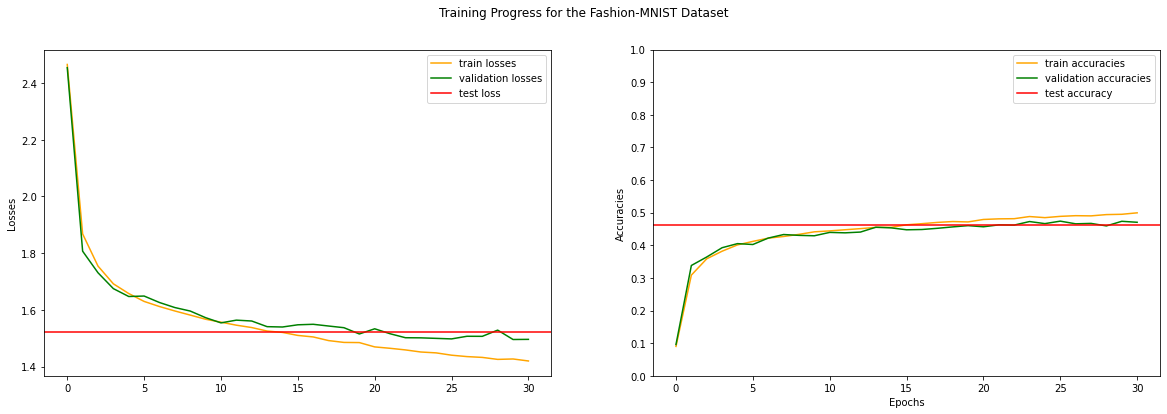

In [9]:
plot_results(losses_dense, accuracies_dense)

(32, 32, 3)


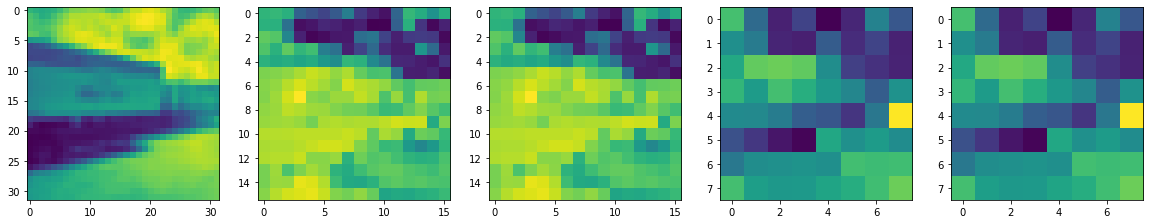

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

In [10]:
for imgs, label in datasets['test'].take(1):
    print(imgs[0].shape)
    show_layer_output(dense_net_model, imgs)